The Rosetta Challenge
=====================

Challenge description
---------------------

The example below is more contrived, but it will be used as a basis to compare Fiatlight with other frameworks and languages, in terms of code, clarity and conciseness.

Suppose we have been given the instructions below. Our goal is to create the most concise and understandable code that follows these instructions.

> Given the function below, which includes hints for the graphical user interface developer as well as documentation for the final user, write a program that implements a GUI for this function.
>
> **Parameters input**
>
> - The age should be entered via a slider.
>  It should take into account the hints given in the user documentation.
> - The name should be entered via a text input. It should occupy one line only.
>   A placeholder "your name..." should be displayed when it is empty.
>
> **Output**
>
> - The program should display the function result as a string. It should be displayed in a text box or label
>
> **User documentation**
>
> - The documentation inside the function below is a user facing doc and should
>  be displayed in an optional tooltip or dialog box that can be opened from the function.
> - Bonus points: display the doc with a nice renderer such as a markdown renderer (for example)

Code of the function for which a GUI is to be created
------------------------------------------------------

Below is an implementation of the Rosetta code in Python. It could be in any language, actually.

In [1]:
def hello_rosetta(name: str, age: int) -> str:
        """hello_rosetta: A function that greets a person by name and age
        ====================================================================
        Args
        ----
        * `name` (str) : The name of the person.
        * `age` (int)  : The age of the person. Should be between 0 and 125
        Returns
        -------
        * `str`        : A greeting message, with a special welcome message for newcomers.

        *Rosetta is an old-fashioned lady, and can only understand non-accentuated latin letters,
        spaces, and "-". Her memory is failing, and she cannot remember more than 10 characters.
        Her keyboard is broken, and she can only type one time the letter 'a' or 'A' per day.*

        Poor Rosetta!
        """

        # Check input, Rosetta is intransigent
        letters_a = list(filter(lambda x: x == "a" or x == "A", name))
        if len(letters_a) > 1:
            return "My keyboard is broken, I can only type one time the letter 'a' or 'A' per day."

        if len(name) == 0:
            raise ValueError("Please enter your name.")
        elif len(name) > 10:
            raise ValueError("My memory is failing, please enter a name with less than 10 characters.")
        elif not name.isalpha():
            raise ValueError("Hey, I'm an old-fashioned lady, I can only understand non-accentuated latin letters.")
        elif not 0 <= age <= 125:
            raise ValueError("Sure you are not a ghost? Please enter an age between 0 and 125.")

        if age == 0:
            return f"Hello, {name}, welcome to the world!"
        elif age == 1:
            return f"Hello, {name}, you are {age} year old."
        else:
            return f"Hello, {name}, you are {age} years old."

### Solution with fiatlight

Below is the implementation of the solution with Fiatlight: 23 lines, including empty lines and comments!
It is even shorter than the specification.

2024-06-17 01:59:07.240 Python[40904:28949420] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.


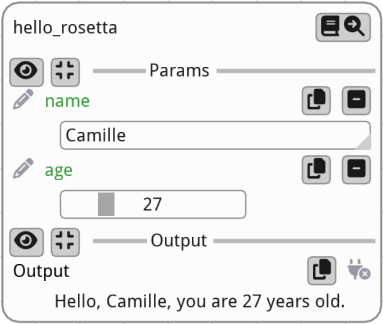

In [3]:
import fiatlight as fl  # noqa


def validate_name(name: str) -> fl.DataValidationResult:
    if len(name) == 0:
        return fl.DataValidationResult.error("Please enter your name.")
    if len(name) > 10:
        return fl.DataValidationResult.error("No more than 10 characters, please")
    if not name.isalpha():
        return fl.DataValidationResult.error("Only non-accentuated latin letters are allowed")
    letters_a = list(filter(lambda x: x == "a" or x == "A", name))
    if len(letters_a) > 1:
        return fl.DataValidationResult.error("Only one 'a' or 'A' is allowed")

    return fl.DataValidationResult.ok()


fl.add_fiat_attributes(
    hello_rosetta,
    age__range=(0, 125),
    name__hint="Enter your name",
    name__validate_value=validate_name,
    doc_display=True,
)

fl.run(hello_rosetta, app_name="Rosetta Challenge")

*Below is a video of this application*

<video src="_static/videos/rosetta.mp4" controls preload></video>